# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# mouse_metadata.head()
# mouse_metadata.info()

In [3]:
# study_results.head()
# study_results.info()

In [4]:
# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on="Mouse ID",  how="left")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
df.set_index(["Mouse ID", "Timepoint"])


Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. **Ask the Expert
dup_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(dup_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989"] 

In [10]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = clean_df["Mouse ID"].nunique()
updated_mice_count

248

In [11]:
# clean_df.head(25)
# clean_df.info

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_var,
    "Tumor Volume Std. Dev." : tumor_std,
    "Tumor Volume Std. Err." : tumor_sem
    
}

summ1 = pd.DataFrame(data).reset_index()
summ1

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg= {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
summ2 = clean_df.groupby(["Drug Regimen"]).agg(tumor_agg).reset_index()
summ2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

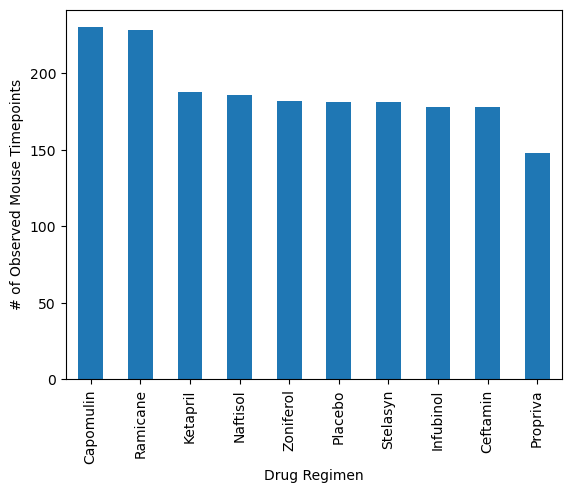

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind="bar",xlabel=("Drug Regimen"),
ylabel=("# of Observed Mouse Timepoints")) 
plt.show

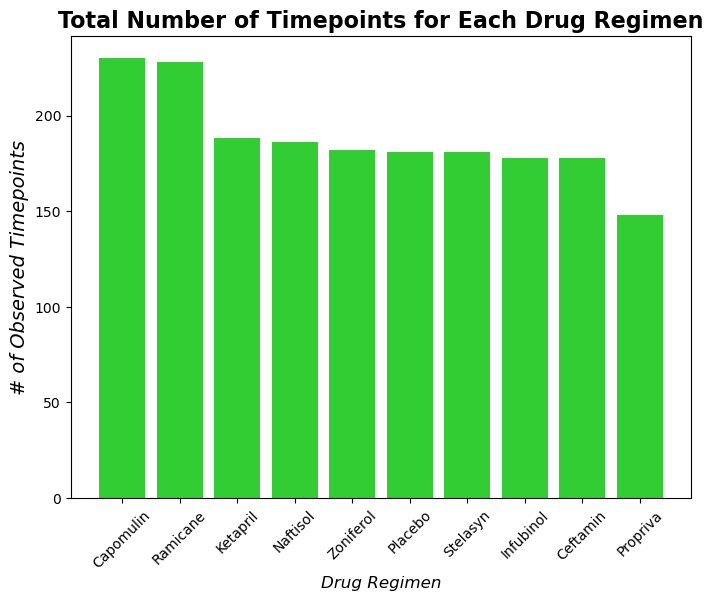

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = clean_df["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)
plt.figure(figsize=(8,6))
plt.bar(x,y, color="limegreen")
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.ylabel("# of Observed Timepoints", fontsize=14, fontstyle="italic")
plt.title("Total Number of Timepoints for Each Drug Regimen", fontsize=16, fontweight="bold")
plt.xticks(rotation=45) 
plt.show()

In [16]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<Axes: title={'center': 'Distribution of Female vs. Male Mice(Observations)'}, ylabel='Count'>

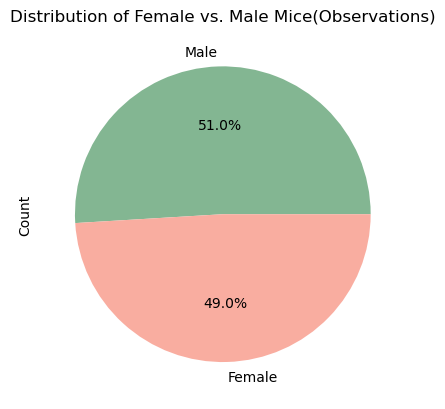

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts().reset_index()
gender.columns = ["Sex", "Count"]
colors = ["#83B692","#F9ADA0"]
gender.set_index("Sex").plot(kind="pie", y="Count", title="Distribution of Female vs. Male Mice(Observations)", colors=colors, autopct="%1.1f%%", legend=False)


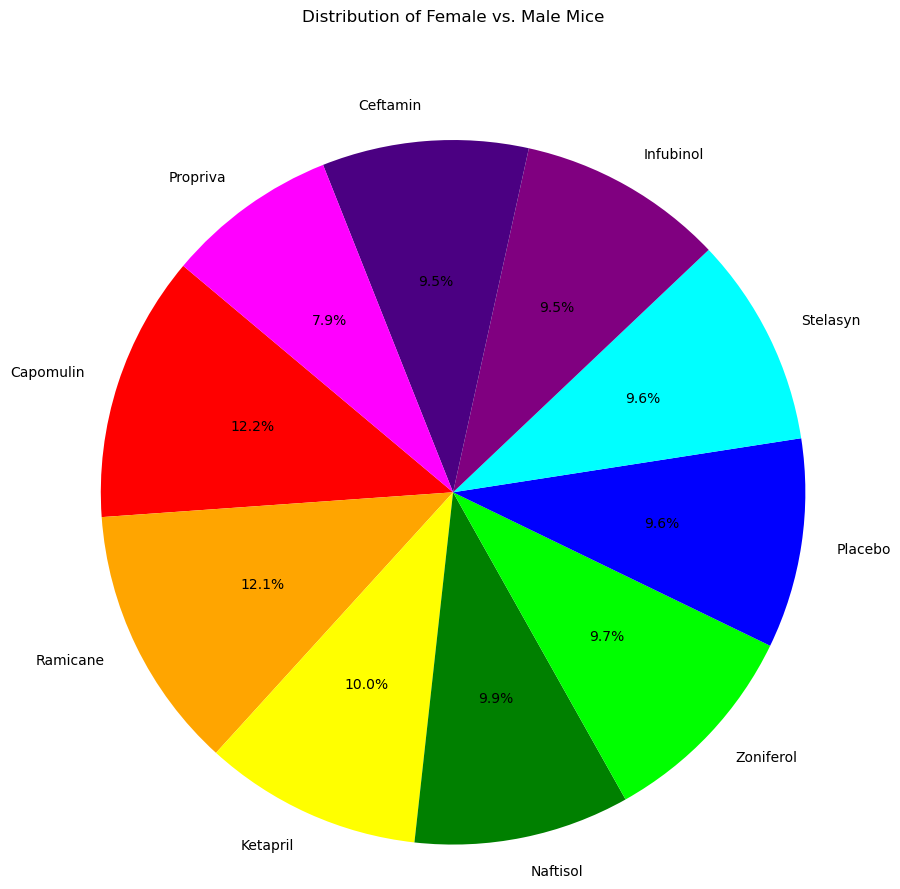

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df["Sex"].value_counts().reset_index()
gender.columns = ["Sex", "Count"]

plt.figure(figsize=(10, 10))
#colors = ["A3B692","#F9ADA0","#F9627D","#C65B7C","#5B758","#BC8DA7","#BDB4BF","#77AF9C","#FFA0AC","#8E3B46"]
colors = ["red","orange","yellow","green","lime","blue","cyan","purple","indigo","magenta"]
plt.pie(y, labels=x, autopct="%1.1f%%", startangle=140, colors=colors)
plt.axis("equal")  
plt.title("Distribution of Female vs. Male Mice", y=1.1) #ask the expert - how to adjust the position of the title
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
import seaborn as sns

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

################### USE SEABORN
# What we want to do here is do something called a grouped box plot
# for each treatment, right for each drug. I want to create 4 box blocks, and I want to stick them next to each other. 
# So that's what I want to do, and that's really difficult to do and map what lip. So essentially, what they're doing here is you're refactoring the entire data set to get those 4 boxes, and then you can put them next to each other.
# Yeah. And this is known as a group to Box Spot.
# where you have multiple box plots like side by side, right


In [21]:
# treatment_list = ["Caponulin", "Ramicane", "Infubinol", "Ceftamin"]

In [22]:
# tumor_vol_list = []

In [23]:
# for drug in treatment_list:
    final_tumor_vol = clean_df.loc[clean_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiels [0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    

IndentationError: unexpected indent (3189197693.py, line 2)

In [ ]:
# sns.boxplot(data=clean_df, x="Drug Regimen", y="Tumor Volume (mm3)")

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
